# Predicting Hit Songs in Ghana with Multiple Models

### Import Relevant Libraries

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn import metrics
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

### Load Dataset 

In [2]:
df = pd.read_csv('gh_songs.csv')

In [3]:
df["status"].replace({"hit": "1", "non_hit": "0"}, inplace=True)
df["explicit"].replace({True: "1", False: "0"}, inplace=True)

In [4]:
df

,album_,artists_,track_name,release_year,release_month,duration_min,explicit,popularity,key,mode,...,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,status
0,Janesis,Efya,Heartbeat,2016,April,4.251317,0,11,0,1,...,0.18600,0.614,0.695,0.000000,0.1910,-5.707,0.1220,0.331,95.967,1
1,Fisherman Waves,Gasmilla,Funky,2019,March,3.317600,0,14,7,0,...,0.39700,0.880,0.657,0.000099,0.1130,-6.656,0.0459,0.557,117.008,1
2,Wohekyere,Daddy Lumba,Jane,2005,May,5.997117,0,18,7,1,...,0.07730,0.688,0.539,0.000019,0.1880,-11.291,0.0528,0.564,83.063,1
3,4word,4x4,Mante Ne De,2013,December,3.554417,0,0,7,1,...,0.05030,0.959,0.903,0.000000,0.1560,-3.663,0.0629,0.872,125.037,0
4,Lige Nu,M.anifest,Nok Af Dig,2013,November,2.797033,0,0,11,0,...,0.07240,0.696,0.815,0.000000,0.0729,-6.076,0.0549,0.771,136.727,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,Hunger & Thirst: The Mixtape,D-Black,Omega (feat. Sarkodie),2017,December,4.644133,0,18,0,1,...,0.49700,0.934,0.750,0.000029,0.1130,-4.831,0.1960,0.802,112.001,1
1293,The Plug,Medikal,Father,2019,July,3.713833,0,19,3,1,...,0.08680,0.793,0.618,0.000000,0.1160,-7.146,0.0582,0.740,106.094,1
1294,Da Revolution,R2Bees,Kiss Your Hand (feat. Wande Coal),2009,July,4.470217,0,33,5,1,...,0.18800,0.754,0.946,0.000000,0.0706,-3.581,0.0537,0.923,125.013,1
1295,The Very Best of Daddy Lumba Vol. 1,Daddy Lumba,Ankwanomaa,2002,February,5.681550,0,21,5,1,...,0.00838,0.737,0.826,0.001560,0.5200,-12.342,0.0638,0.660,119.757,1


## Implementing the Random Forest Model 

In [5]:
cols = ['acousticness', 'danceability',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence',
       'tempo']
X = df[cols]
y = df['status']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=220, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [37]:
y_test.astype(float)

150     1.0
1089    0.0
480     1.0
343     0.0
1264    1.0
       ... 
482     0.0
244     1.0
60      1.0
1058    1.0
513     0.0
Name: status, Length: 260, dtype: float64

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test.astype(float),y_pred.round()))
print(classification_report(y_test.astype(float),y_pred.round()))
print(accuracy_score(y_test.astype(float), y_pred.round()))

[[83 41]
 [60 76]]
              precision    recall  f1-score   support

         0.0       0.58      0.67      0.62       124
         1.0       0.65      0.56      0.60       136

    accuracy                           0.61       260
   macro avg       0.61      0.61      0.61       260
weighted avg       0.62      0.61      0.61       260

0.6115384615384616


## Implementing the Decision Tree model 

In [39]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:
y_pred = classifier.predict(X_test)

In [41]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[78 46]
 [70 66]]
              precision    recall  f1-score   support

           0       0.53      0.63      0.57       124
           1       0.59      0.49      0.53       136

    accuracy                           0.55       260
   macro avg       0.56      0.56      0.55       260
weighted avg       0.56      0.55      0.55       260



## Implementing the Support Vector Machine Model 

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [51]:
y_pred = svclassifier.predict(X_test)

In [52]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[75 49]
 [54 82]]
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       124
           1       0.63      0.60      0.61       136

    accuracy                           0.60       260
   macro avg       0.60      0.60      0.60       260
weighted avg       0.60      0.60      0.60       260



## Implementing K-Nearest Neighbor Model 

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
neighbors = list(range(1, 50, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 3


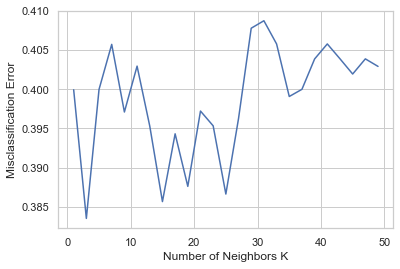

In [96]:
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()


In [97]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [98]:
y_pred = classifier.predict(X_test)


In [99]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[82 42]
 [64 72]]
              precision    recall  f1-score   support

           0       0.56      0.66      0.61       124
           1       0.63      0.53      0.58       136

    accuracy                           0.59       260
   macro avg       0.60      0.60      0.59       260
weighted avg       0.60      0.59      0.59       260



## Implementing the XGBoost Classifier Model 

In [56]:
from xgboost import XGBClassifier


In [57]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [58]:
score = xgb_clf.score(X_test, y_test)
print(score)

0.6


In [59]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[75 49]
 [54 82]]
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       124
           1       0.63      0.60      0.61       136

    accuracy                           0.60       260
   macro avg       0.60      0.60      0.60       260
weighted avg       0.60      0.60      0.60       260



## Implementing Gradient Boosting  

In [102]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier


In [103]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    print(" ")

Learning rate:  0.05
Accuracy score (training): 0.652
Accuracy score (validation): 0.581
 
Learning rate:  0.075
Accuracy score (training): 0.657
Accuracy score (validation): 0.577
 
Learning rate:  0.1
Accuracy score (training): 0.662
Accuracy score (validation): 0.573
 
Learning rate:  0.25
Accuracy score (training): 0.689
Accuracy score (validation): 0.596
 
Learning rate:  0.5
Accuracy score (training): 0.725
Accuracy score (validation): 0.592
 
Learning rate:  0.75
Accuracy score (training): 0.735
Accuracy score (validation): 0.604
 
Learning rate:  1
Accuracy score (training): 0.770
Accuracy score (validation): 0.608
 


In [108]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=1.0, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print(" ")

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[79 45]
 [57 79]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.58      0.64      0.61       124
           1       0.64      0.58      0.61       136

    accuracy                           0.61       260
   macro avg       0.61      0.61      0.61       260
weighted avg       0.61      0.61      0.61       260

